<a href="https://colab.research.google.com/github/Maoelan/Predictive_Maintenance-Imbalanced_Multiclass_Classification/blob/main/Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [248]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Datasets : https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [250]:
mc = pd.read_csv("/content/drive/MyDrive/dataset/predictive_maintenance.csv")
mc.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [251]:
mc.columns = ['udi', 'product_id', 'type', 'air_temprature', 'process_temprature', 'rotational_speed', 'torque', 'tool_wear', 'target', 'failure_type']

In [252]:
le = preprocessing.LabelEncoder()
mc.product_id = le.fit_transform(mc.product_id)
mc.type = le.fit_transform(mc.type)
mc.failure_type = le.fit_transform(mc.failure_type)

In [253]:
mc

,udi,product_id,type,air_temprature,process_temprature,rotational_speed,torque,tool_wear,target,failure_type
0,1,7003,2,298.1,308.6,1551,42.8,0,0,1
1,2,1003,1,298.2,308.7,1408,46.3,3,0,1
2,3,1004,1,298.1,308.5,1498,49.4,5,0,1
3,4,1005,1,298.2,308.6,1433,39.5,7,0,1
4,5,1006,1,298.2,308.7,1408,40.0,9,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,2,298.8,308.4,1604,29.5,14,0,1
9996,9997,1001,0,298.9,308.4,1632,31.8,17,0,1
9997,9998,9998,2,299.0,308.6,1645,33.4,22,0,1
9998,9999,1002,0,299.0,308.7,1408,48.5,25,0,1


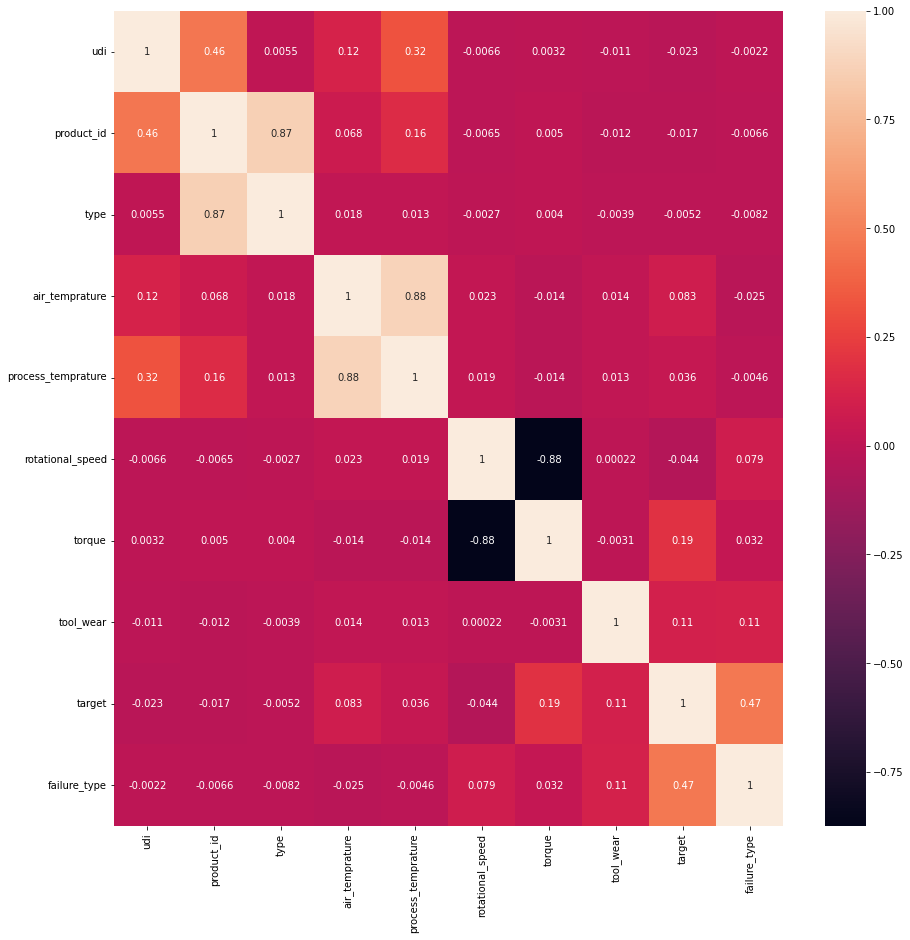

In [271]:
corr = mc.corr()
plt.subplots(figsize=(15,15))

sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

In [255]:
mc['failure_type'].value_counts()

1    9652
0     112
3      95
2      78
5      45
4      18
Name: failure_type, dtype: int64

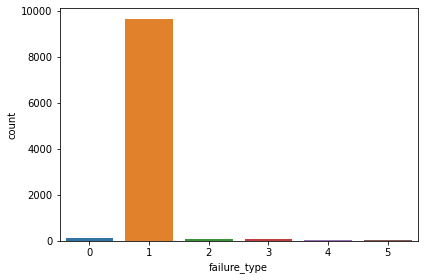

In [256]:
sns.countplot(data=mc, x="failure_type")
plt.tight_layout()

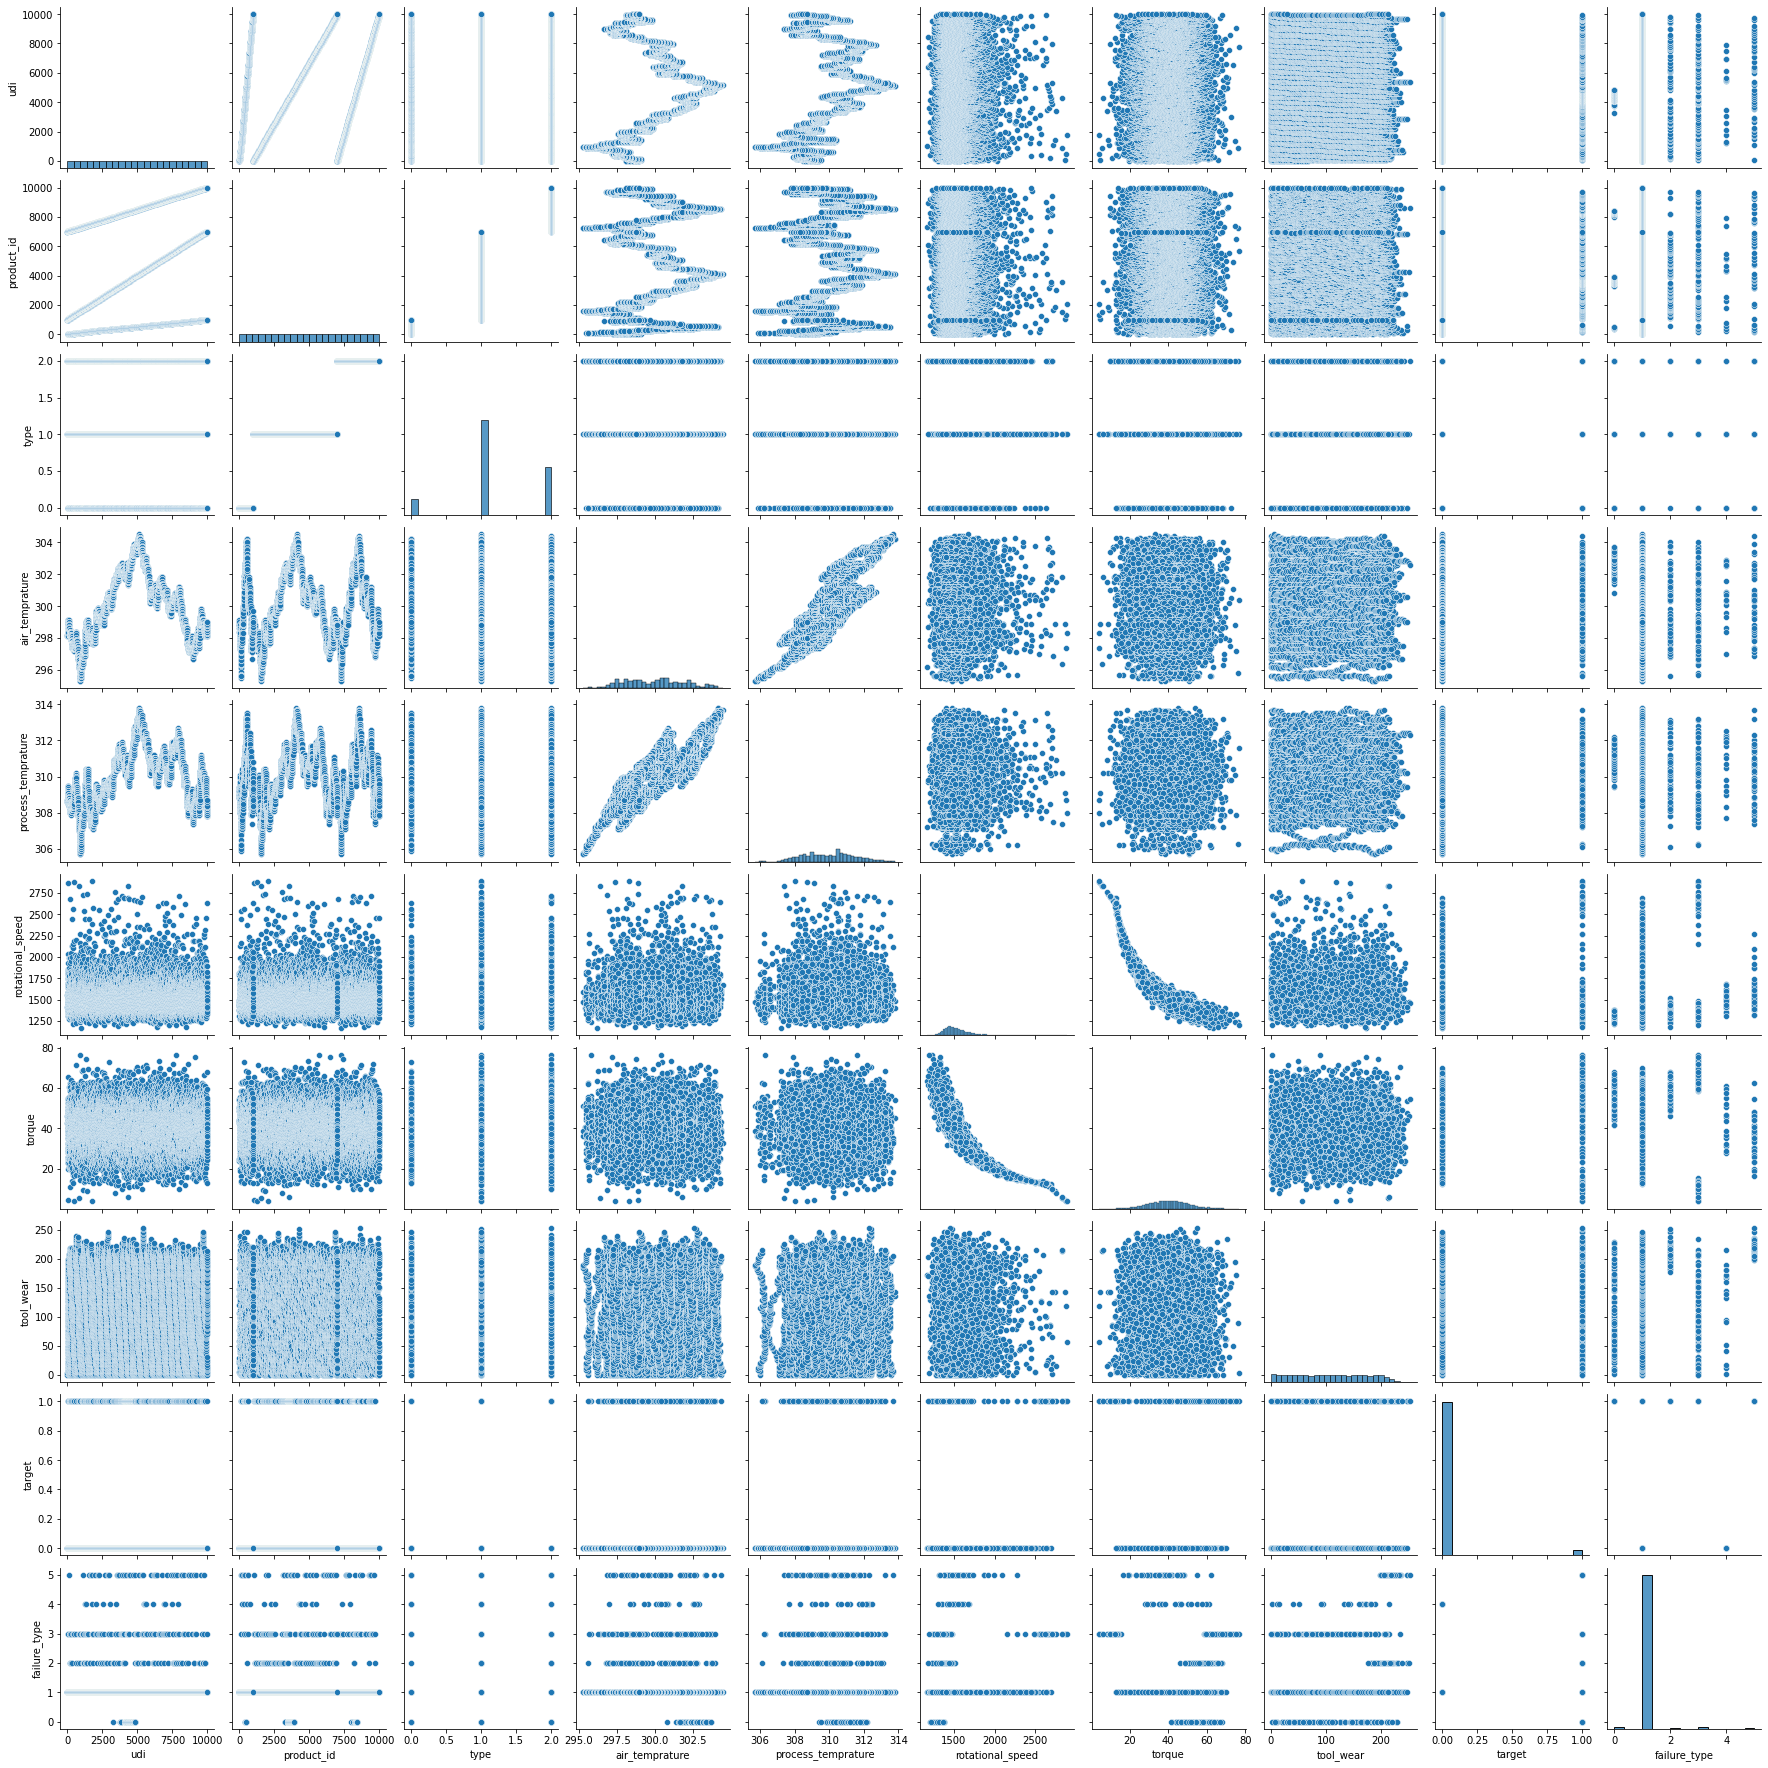

In [257]:
sns.pairplot(mc)

In [258]:
x = mc.iloc[:,:9]
x

,udi,product_id,type,air_temprature,process_temprature,rotational_speed,torque,tool_wear,target
0,1,7003,2,298.1,308.6,1551,42.8,0,0
1,2,1003,1,298.2,308.7,1408,46.3,3,0
2,3,1004,1,298.1,308.5,1498,49.4,5,0
3,4,1005,1,298.2,308.6,1433,39.5,7,0
4,5,1006,1,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...,...,...
9995,9996,9997,2,298.8,308.4,1604,29.5,14,0
9996,9997,1001,0,298.9,308.4,1632,31.8,17,0
9997,9998,9998,2,299.0,308.6,1645,33.4,22,0
9998,9999,1002,0,299.0,308.7,1408,48.5,25,0


In [259]:
y = mc.iloc[:,9]
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: failure_type, Length: 10000, dtype: int64

In [260]:
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
x,y = resample.fit_resample(x,y)

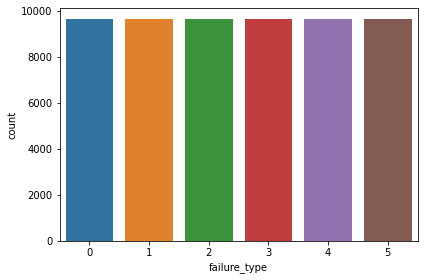

In [261]:
sns.countplot(data=x, x=y)
plt.tight_layout()

In [262]:
y.value_counts()

1    9652
3    9652
5    9652
2    9652
4    9652
0    9645
Name: failure_type, dtype: int64

In [263]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [264]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [265]:
rfc_pred = rfc.predict(x_test)
rfc_pred

array([4, 4, 1, ..., 4, 3, 0])

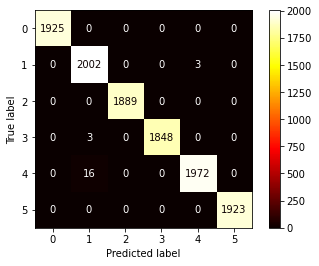

In [270]:
knn_cm = confusion_matrix(rfc_pred, y_test, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm,display_labels=rfc.classes_)
disp.plot(cmap=plt.cm.hot)
plt.show()

In [266]:
print('Classification Report : \n', classification_report(rfc_pred, y_test))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1925
           1       0.99      1.00      0.99      2005
           2       1.00      1.00      1.00      1889
           3       1.00      1.00      1.00      1851
           4       1.00      0.99      1.00      1988
           5       1.00      1.00      1.00      1923

    accuracy                           1.00     11581
   macro avg       1.00      1.00      1.00     11581
weighted avg       1.00      1.00      1.00     11581



In [267]:
print(accuracy_score(rfc_pred, y_test))

0.9981003367584838
